In [0]:
import os
import pandas as pd
import numpy as np
import timeit
import ujson
#Usamos ujson que parece que es el que hace la importación más rápida. Añadir la documentación donde se comenta.
#from google.colab import drive  #Lo pongo más abajo, porque si no me da error (por qué??!!)

#Para conocer el uso de la memoria
import os 
import psutil

In [3]:
!ls -lh

total 4.0K
drwxr-xr-x 2 root root 4.0K Oct 29 16:42 sample_data


##IMPORTACIÓN DESDE GOOGLE DRIVE

In [0]:
#Esto sólo funciona en Google Colab porque tiene una librería de Google Colab.
#Más documentación en:
#https://colab.research.google.com/notebooks/io.ipynb
#en el apartado PyDrive.
#PyDrive documentación:
#https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

In [0]:
#Estos ficheros están en mi google drive.

#movies data
file_id = '1-jrX_p1VfgMceGIj7SK_eIef8syIGsdL'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("movies.zip")

#movies ids
file_id = '1-1M-smshevfKWEj5DPpxHJ6QzP82m2c7'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Movies_ids.csv")

#people data
file_id = '1UnpPTqVcghfQzj55RIoLm8pBH_Rjdl4f'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("people.zip")

#people ids
file_id = '19oOa9qjMFnDv19DHmNTTJKIuGW8X5BkQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Cast_Crew_ids.csv")

#IMDB 5000 movies:
file_id = '1ebj6EkGylXTGldfGfJO_AHEAncNf4zKA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("IMDB_5000_movie.csv")

In [5]:
!ls -lh

total 3.2G
-rw-r--r-- 1 root root 2.5K Oct 30 08:46 adc.json
-rw-r--r-- 1 root root 2.7M Oct 30 08:47 Cast_Crew_ids.csv
-rw-r--r-- 1 root root 1.5M Oct 30 08:47 IMDB_5000_movie.csv
-rw-r--r-- 1 root root 117K Oct 30 08:47 Movies_ids.csv
-rw-r--r-- 1 root root 1.5G Oct 30 08:47 movies.zip
-rw-r--r-- 1 root root 1.8G Oct 30 08:47 people.zip
drwxr-xr-x 2 root root 4.0K Oct 26 16:42 sample_data


In [6]:
#Da un error pero no tiene consecuencias
!mkdir themoviedb_data
!cd themoviedb_data && unzip -q ../movies.zip
!cd themoviedb_data && unzip -q ../people.zip
!ls -lh themoviedb_data

warning [../movies.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../movies.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #409792).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
warning [../people.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../people.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #1197557).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
total 44M
drwxr-xr-x 2 root root 12M Oct 

In [7]:
!ls -1 themoviedb_data/movies | wc -l

409791


In [8]:
!ls -1 themoviedb_data/people | wc -l

1197556


In [9]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

151707648


In [10]:
%whos

Variable            Type               Data/Info
------------------------------------------------
GoogleAuth          type               <class 'pydrive.auth.GoogleAuth'>
GoogleCredentials   type               <class 'oauth2client.client.GoogleCredentials'>
GoogleDrive         type               <class 'pydrive.drive.GoogleDrive'>
auth                module             <module 'google.colab.aut<...>es/google/colab/auth.py'>
downloaded          GoogleDriveFile    GoogleDriveFile({'id': '1<...>Q', 'spaces': ['drive']})
drive               GoogleDrive        <pydrive.drive.GoogleDriv<...>object at 0x7f0f317d5fd0>
file_id             str                1ebj6EkGylXTGldfGfJO_AHEAncNf4zKA
gauth               GoogleAuth         <pydrive.auth.GoogleAuth <...>object at 0x7f0f23a07dd8>
np                  module             <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os                  module             <module 'os' from '/usr/lib/python3.6/os.py'>
pd                  module        

##ACCESO A MI DRIVE

In [11]:
#Esto me va a permitir tener acceso a las carpetas de mi drive desde Colab:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
!ls "/content/drive/My Drive/" -lh

total 3.2G
drwx------ 2 root root 4.0K Jul 14 07:08  20180714_Deep_Learning
-rw------- 1 root root  76K Oct 22 18:13  6885.json
drwx------ 2 root root 4.0K Jun 26  2016 'avast! Files (XT1068, UWbYzWPVmAmwlrlD)'
-rw------- 1 root root 2.7M Oct 28 21:03  Cast_Crew_ids.csv
drwx------ 2 root root 4.0K Jul 18 18:38 'Colab Notebooks'
-rw------- 1 root root  44K Feb  4  2018  contacts.vcf
-rw------- 1 root root    1 Apr  9  2018  facturaIVA.gsheet
-rw------- 1 root root 1.5M Oct 24 17:34  IMDB_5000_movie.csv
-rw------- 1 root root    1 Oct 29 09:45 'Mis cuentas.gsheet'
-rw------- 1 root root 117K Oct 28 21:04  Movies_ids.csv
-rw------- 1 root root 1.5G Oct 12 15:09  movies.zip
-rw------- 1 root root    1 Oct 20 08:40 'Nuestras Cuentas.gsheet'
-rw------- 1 root root 1.8G Oct 27 13:06  people.zip
-rw------- 1 root root    1 Jul 24 18:17 'Propuesta de una idea.gslides'
drwx------ 2 root root 4.0K Apr  7  2015  Screencastify
-rw------- 1 root root    1 Sep 30  2017  Series.gdoc
-rw------- 1 root 

## IMPORTACIÓN DE LOS JSON'S DE PELÍCULAS A UN DATAFRAME

In [13]:
#Reading file and saving in df
dfMoviesIds = pd.read_csv('./Movies_ids.csv')
dfMoviesIds.tail()

,Unnamed: 0,movie_id
10851,10851,397837
10852,10852,77866
10853,10853,220669
10854,10854,140581
10855,10855,70868


In [0]:
setMoviesIds = set(dfMoviesIds['movie_id'])

In [15]:
#Lo importo todo. Tengo que reducir el número de campos para que me quepa en memoria.
#Excluyo: backdrop_path, external_ids, homepage, images_backdrops, images_posters, poster_path, similar_movies_page/results/total_pages/total_results,
#video, recommendations_page/results/total_pages/total_results
#Recommendations: películas recomendadas para una película. No es lo mismo que similar_movies.
#Para hacer esto debería hacer una importación inicial de todos los campos y luego, una vez decidido, importo todo.

#Usamos un generator, que es más eficiente en cuanto a memoria. "yield" va asociado al generator.
#Poner la nota: importo todo, aunque sé que lo voy a usar, por si alguien puede querer usarlo.
#Desanido el primer nivel de diccionarios. Para belongs_to_collection, que a veces es nulo en lugar de un diccionario, tomo dos keys.
#Me queda tratar las listas que contienen diccionarios. 
#¿Qué pasa con UTF8? !!!!!!!!!!!!!!!!!!!!!!!!!!
#No vale de nada cambiar el orden!!! Así que mantengo el alfabético del csv
#Por mi código anterior ya sé que adult es un booleano y que no tiene nulos. Así que puedo filtrarlo por adult = False. Voy a excluir estas
#pelis de mi análisis.

#Sobre mi notebook 03 he incluido la variable imdb_id, que necesito para el cruce posterior que hago.

path = "./themoviedb_data/movies"
dfMovies = pd.DataFrame()

def moviesIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"titles": data["alternative_titles"]["titles"], 
                       "budget": data["budget"], "credits_cast": data["credits"]["cast"], "credits_crew": data["credits"]["crew"],
                       "genres": data["genres"], "movie_id": data["id"], "imdb_id": data["imdb_id"],
                       "keywords": data["keywords"]["keywords"], "original_language": data["original_language"],
                       "original_title": data["original_title"], "overview": data["overview"],
                       "popularity": data["popularity"], 
                       "production_companies": data["production_companies"], "production_countries": data["production_countries"],
                       "release_date": data["release_date"], "release_dates": data["release_dates"]["results"],
                       "revenue": data["revenue"], 
                       "reviews_page": data["reviews"]["page"],
                       "reviews_results": data["reviews"]["results"],
                       "reviews_total_pages": data["reviews"]["total_pages"],
                       "reviews_total_results": data["reviews"]["total_results"],
                       "runtime": data["runtime"],
                       "spoken_languages": data["spoken_languages"], "status": data["status"],
                       "tagline": data["tagline"], "title": data["title"], 
                       "vote_average": data["vote_average"], "vote_count": data["vote_count"]}
                    
                if data["belongs_to_collection"] is None:
                    result["belongs_to_collection_id"] = None
                    result["belongs_to_collection_name"] = None
                else:
                    result["belongs_to_collection_id"] = data["belongs_to_collection"]["id"]
                    result["belongs_to_collection_name"] = data["belongs_to_collection"]["name"]
                    
                if data["adult"] == False and data["id"] in setMoviesIds:
                    yield result
                      
tic=timeit.default_timer()
dfMovies = pd.DataFrame(moviesIterator(path))
#dfMovies.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000


371.819068432

In [16]:
dfMovies.shape

(10856, 30)

In [17]:
dfMoviesIds.shape

(10856, 2)

In [18]:
dfMovies.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'credits_cast', 'credits_crew', 'genres', 'imdb_id', 'keywords',
       'movie_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'release_dates', 'revenue', 'reviews_page',
       'reviews_results', 'reviews_total_pages', 'reviews_total_results',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'titles',
       'vote_average', 'vote_count'],
      dtype='object')

In [0]:
dfMovies.index = dfMovies['movie_id']

In [20]:
dfMovies['movie_id'].head()

movie_id
12709    12709
31387    31387
1979      1979
36423    36423
9792      9792
Name: movie_id, dtype: int64

In [21]:
#Compruebo que no se repite el identificador id de tmdb de las películas:
dfMovies['movie_id'].duplicated().sum()

0

In [0]:
#columnName: columna de dfMovies a tratar. Sus elemeentos son listas de diccionarios.
#args: lista variable de claves con las que me voy a quedar de los diccionarios.
#Si un elemento es una lista vacía, no hay problema.

#Esta función requiere que el index sea el id de la película. Podría cambiarse para que no fuese así, pero sería mucho más lenta.
def columnIteratorMovies(columnName, *args):
    for id in dfMovies.index:
        for dict in dfMovies[dfMovies.index == id][columnName].iloc[0]:
            outputDict = {'movie_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [0]:
#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesMovies (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfMovies
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorMovies(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfMovies[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfMovies = dfMovies.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

In [0]:
def columnIteratorReleaseDates(*args):
    dfMoviesReleaseDates1 = columnProcessesMovies ('release_dates', 'iso_3166_1', 'release_dates')
    
    for id in dfMoviesReleaseDates1.index:
        for dict in dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['release_dates'].iloc[0]:
            outputDict = {'movie_id': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['movie_id'].iloc[0],
                         'iso_3166_1': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['iso_3166_1'].iloc[0]}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [25]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

989110272


##ENRIQUECIMIENTO DE LA INFORMACIÓN DE PELÍCULAS CON LA FUENTE IMDB:

In [26]:
my_file_path='./IMDB_5000_movie.csv'

#Reading file and saving in df
dfMovies5000 = pd.read_csv(my_file_path)
dfMovies5000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [27]:
dfMovies5000.shape

(5043, 28)

In [28]:
dfMovies5000.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [0]:
#Construyo una nueva columna con el identificador de imdb: id_imdb
dfMovies5000['imdb_id'] = dfMovies5000['movie_imdb_link'].str.split("/").map(lambda list: list[4])

In [0]:
#O sea: los duplicados a nivel de clave lo son también a nivel de gross y budget salvo por un registro. Voy a eliminar los
#duplicados a nivel de clave quedándome con el primero de los registros que me encuentre (SIMPLIFICACIÓN).
dfMovies5000 = dfMovies5000.drop_duplicates(subset='imdb_id', keep='first')

In [0]:
#Debería sustituir las cadenas de longitud vacía por nulos, para tener un criterio homogéneo. Lo hago:
#Podría mejorarlo (si necesito aplicarlo a otros) y convertir cualquier cadena de longitud vacía en nulos.
#Esta función se aplica a cualquier tipo de dato y devuelvo un None si la entrada es ''
def fill_blank_with_nones(value):
    if value=='':
        return None
    else:
        return value

In [0]:
dfMovies['imdb_id']=dfMovies['imdb_id'].map(fill_blank_with_nones)

In [33]:
#Veo si lo he hecho bien: ¿cuántos nulos tengo ahora?
dfMovies['imdb_id'].isnull().sum()

453

In [34]:
dfMovies["imdb_id"].value_counts().head(5)

tt0120633    1
tt0186045    1
tt0107953    1
tt0093304    1
tt0026071    1
Name: imdb_id, dtype: int64

In [0]:
#Quiero cambiar el nombre de algunas columnas antes de cruzar, para que sean más fácilmente identificables:
def change_column_names(str):
    if str == 'budget':
        return 'imdb_budget'
    elif str == 'gross':
        return 'imdb_revenue'
    else:
        return str

In [0]:
dfMovies5000.columns = list(map(change_column_names, dfMovies5000.columns.tolist()))

In [37]:
dfMovies5000.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'imdb_revenue', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'imdb_budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_id'],
      dtype='object')

In [0]:
#Hago el cruce:
dfMovies = dfMovies.merge(dfMovies5000[['imdb_id', 'imdb_revenue', 'imdb_budget', 'director_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']], how='left', left_on='imdb_id', right_on='imdb_id')

In [39]:
dfMovies.shape

(10856, 35)

In [0]:
#Pero ahora tengo distinto criterio en budget y revenue para tmdb e imdb:
#Igualo criterios:
def change_none_to_zero(num):
    if num != num or num is None:
        return 0
    else:
        return num

In [0]:
dfMovies['imdb_budget'] = dfMovies['imdb_budget'].map(change_none_to_zero)
dfMovies['imdb_revenue'] = dfMovies['imdb_revenue'].map(change_none_to_zero)

In [42]:
#Chequeo:
dfMovies[['budget', 'revenue', 'imdb_budget', 'imdb_revenue']].notnull().sum()

budget          10856
revenue         10856
imdb_budget     10856
imdb_revenue    10856
dtype: int64

In [43]:
#¿Cuántos 0s tengo?
dfMovies[['budget', 'revenue', 'imdb_budget', 'imdb_revenue']].applymap(lambda num: num==0).sum()

budget          3687
revenue          842
imdb_budget     6859
imdb_revenue    6805
dtype: int64

In [0]:
#Voy a adoptar un criterio simple ahora: tomo el dato de tmdb de revenue o budget, a no ser que sea 0 o <50, en cuyo caso tomo el de imdb.
#Afinarlo más adelante!!!!
dfMovies['revenue_final'] = dfMovies['revenue'] * ((dfMovies['revenue']>50) | ((dfMovies['revenue']<=50) & (dfMovies['imdb_revenue']==0))) + dfMovies['imdb_revenue'] * (~((dfMovies['revenue']>50) | ((dfMovies['revenue']<=50) & (dfMovies['imdb_revenue']==0))))
dfMovies['budget_final'] = dfMovies['budget'] * ((dfMovies['budget']>50) | ((dfMovies['budget']<=50) & (dfMovies['imdb_budget']==0))) + dfMovies['imdb_budget'] * (~((dfMovies['budget']>50) | ((dfMovies['budget']<=50) & (dfMovies['imdb_budget']==0))))

In [45]:
#¿Cuántos 0s tengo?
dfMovies[['budget', 'revenue', 'imdb_budget', 'imdb_revenue', 'budget_final', 'revenue_final']].applymap(lambda num: num==0).sum()

budget           3687
revenue           842
imdb_budget      6859
imdb_revenue     6805
budget_final     3212
revenue_final       0
dtype: int64

In [46]:
#En algún paso me he cargado los índices:
dfMovies['movie_id'].head()

0    12709
1    31387
2     1979
3    36423
4     9792
Name: movie_id, dtype: int64

In [0]:
#Vuelvo a machacarlos con el movie_id:
dfMovies.index = dfMovies['movie_id']

In [48]:
dfMovies['movie_id'].head()

movie_id
12709    12709
31387    31387
1979      1979
36423    36423
9792      9792
Name: movie_id, dtype: int64

In [49]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

1002663936


##IMPORTACIÓN DE LOS JSON'S DE CAST/CREW A UN DATAFRAME

##### IMPORTO LAS PERSONAS A UN DATAFRAME, YA EXCLUYENDO ALGUNOS CAMPOS Y SÓLO TOMANDO LOS ID'S QUE HAN TRABAJADO EN PELIS CON REVENUE_FINAL>0

In [50]:
#Reading file and saving in df
dfPeopleIds = pd.read_csv('./Cast_Crew_ids.csv')
dfPeopleIds.tail()

,Unnamed: 0,id
203176,203176,1112938
203177,203177,1112939
203178,203178,1112940
203179,203179,34438
203180,203180,567605


In [0]:
setPeopleIds = set(dfPeopleIds['id'])

In [52]:
#Usamos un generator, que es más eficiente en cuanto a memoria. "yield" va asociado al generator.
#Excluyo: also_known_as, biography, external_ids_imdb_id, homepage, images_profiles, profile_path
#Además, sólo tomo los ids que están en el set setPeopleIds

#This takes about 20min to be executed in Google Colab

path = "./themoviedb_data/people"
dfPeople = pd.DataFrame()

def peopleIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"adult": data["adult"], 
                          "birthday": data["birthday"], "deathday": data["deathday"], 
                          "gender": data["gender"], "people_id": data["id"], "imdb_id": data.get("imdb_id",None),
                          "known_for_department": data["known_for_department"], "name": data["name"], "place_of_birth": data["place_of_birth"],
                          "popularity": data["popularity"], "tv_credits_cast": data["tv_credits"]["cast"], 
                          "tv_credits_crew": data["tv_credits"]["crew"]}

                #After the dfTypeCheck, we know that movie_credits is not a dictionary in two rows (probably this is an error.). 
                #So we need to take this situation into consideration:
                if isinstance(data["movie_credits"], dict):
                    result["movie_credits_cast"] = data["movie_credits"]["cast"]
                    result["movie_credits_crew"] = data["movie_credits"]["crew"]
                else:
                    #Aquí es importante poner una lista de longitud vacía, que nos va a evitar problemas.
                    result["movie_credits_cast"] = list()
                    result["movie_credits_crew"] = list()

                if data["id"] in setPeopleIds:    
                    yield result  
                  
tic=timeit.default_timer()
dfPeople = pd.DataFrame(peopleIterator(path))
#dfPeople.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000


1434.106729941

In [53]:
dfPeopleIds.shape

(203181, 2)

In [54]:
#Tengo 23 ids que aparecen en mis películas pero no en mi base de datos de People. Bueno, asumo el ínfimo error.
dfPeople.shape

(203159, 14)

In [55]:
dfPeople.columns

Index(['adult', 'birthday', 'deathday', 'gender', 'imdb_id',
       'known_for_department', 'movie_credits_cast', 'movie_credits_crew',
       'name', 'people_id', 'place_of_birth', 'popularity', 'tv_credits_cast',
       'tv_credits_crew'],
      dtype='object')

In [56]:
#Compruebo que no se repite el identificador id de tmdb de las personas:
dfPeople['people_id'].duplicated().sum()

0

In [0]:
dfPeople.index  = dfPeople['people_id']

In [58]:
dfPeople['people_id'].head()

people_id
1003061    1003061
186246      186246
1340664    1340664
1031990    1031990
1303062    1303062
Name: people_id, dtype: int64

In [0]:
#columnName: columna de dfMovies a tratar. Sus elemeentos son listas de diccionarios.
#args: lista variable de claves con las que me voy a quedar de los diccionarios.
#Si un elemento es una lista vacía, no hay problema.
def columnIteratorPeople(columnName, *args):
    for id in dfPeople.index:
        for dict in dfPeople[dfPeople.index == id][columnName].iloc[0]:
            outputDict = {'people_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [0]:
#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesPeople (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfPeople
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorPeople(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfPeople[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfPeople = dfPeople.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

In [61]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

7087890432


##CREO LAS TABLAS AUXILIARES DE MOVIES Y PEOPLE

In [62]:
dfMovies['movie_id'].head()

movie_id
12709    12709
31387    31387
1979      1979
36423    36423
9792      9792
Name: movie_id, dtype: int64

In [63]:
dfPeople['people_id'].head()

people_id
1003061    1003061
186246      186246
1340664    1340664
1031990    1031990
1303062    1303062
Name: people_id, dtype: int64

In [64]:
#Generación de todas las tablas de una tacada: 
#This module took less than 4min to be executed in Google Colab.
tic=timeit.default_timer()

dfMoviesCast = columnProcessesMovies ('credits_cast', 'cast_id', 'character', 'gender', 'id', 'name', 'order')
print("dfMoviesCast generated")
dfMoviesCrew = columnProcessesMovies ('credits_crew', 'department', 'gender', 'id', 'job', 'name')
print("dfMoviesCrew generated")
dfMoviesGenres = columnProcessesMovies ('genres', 'id', 'name')
print("dfMoviesGenres generated")
dfMoviesKeywords = columnProcessesMovies ('keywords', 'id', 'name')
print("dfMoviesKeywords generated")
dfMoviesProductionComp = columnProcessesMovies ('production_companies', 'id', 'name', 'origin_country')
print("dfMoviesProductionComp generated")
dfMoviesProductionCountries = columnProcessesMovies ('production_countries', 'iso_3166_1', 'name')
print("dfMoviesProductionCountries generated")
dfMoviesReviewsResults = columnProcessesMovies ('reviews_results', 'author', 'content', 'id')
print("dfMoviesReviewsResults generated")
dfMoviesSpokenLang = columnProcessesMovies ('spoken_languages', 'iso_639_1', 'name')
print("dfMoviesSpokenLang generated")
dfMoviesReleaseDates = pd.DataFrame(columnIteratorReleaseDates('certification', 'iso_639_1', 'release_date', 'type'))
print("dfMoviesReleaseDates generated")

#Libero la memoria (realmento no lo hace...)
#dfMoviesReleaseDates1 = pd.DataFrame()
#%xdel dfMoviesReleaseDates1

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

dfMoviesCast generated
dfMoviesCrew generated
dfMoviesGenres generated
dfMoviesKeywords generated
dfMoviesProductionComp generated
dfMoviesProductionCountries generated
dfMoviesReviewsResults generated
dfMoviesSpokenLang generated
dfMoviesReleaseDates generated


233.50802561199998

In [65]:
dfMovies.shape

(10856, 28)

In [66]:
dfMovies.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'imdb_id', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'reviews_page',
       'reviews_total_pages', 'reviews_total_results', 'runtime', 'status',
       'tagline', 'title', 'titles', 'vote_average', 'vote_count',
       'imdb_revenue', 'imdb_budget', 'director_facebook_likes',
       'cast_total_facebook_likes', 'movie_facebook_likes', 'revenue_final',
       'budget_final'],
      dtype='object')

In [67]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

7138066432


In [68]:
#Generación de todas las tablas de una tacada: 
#This module took about 10min to be executed in Google Colab.
tic=timeit.default_timer()

dfPeopleMoviesCast = columnProcessesPeople ('movie_credits_cast', 'adult', 'character', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCast generated")
dfPeopleMoviesCrew = columnProcessesPeople ('movie_credits_crew', 'adult', 'department', 'genre_ids', 'id', 'job', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCrew generated")
dfPeopleTvCast = columnProcessesPeople ('tv_credits_cast', 'character', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCast generated")
dfPeopleTvCrew = columnProcessesPeople ('tv_credits_crew', 'department', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'job', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCrew generated")

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

dfPeopleMoviesCast generated
dfPeopleMoviesCrew generated
dfPeopleTvCast generated
dfPeopleTvCrew generated


708.3322806319998

In [69]:
dfPeople.columns

Index(['adult', 'birthday', 'deathday', 'gender', 'imdb_id',
       'known_for_department', 'name', 'people_id', 'place_of_birth',
       'popularity'],
      dtype='object')

In [70]:
dfPeople.shape

(203159, 10)

####CONTROL DE LA MEMORIA:

In [71]:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

7822524416


In [72]:
#Y así veo cuánta memoria ocupa este dataframe:
dfPeople.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203159 entries, 1003061 to 1701156
Data columns (total 10 columns):
adult                   203159 non-null bool
birthday                43801 non-null object
deathday                10266 non-null object
gender                  203159 non-null int64
imdb_id                 203159 non-null object
known_for_department    203159 non-null object
name                    203159 non-null object
people_id               203159 non-null int64
place_of_birth          36097 non-null object
popularity              203159 non-null float64
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 63.3 MB


In [73]:
%whos

Variable                      Type               Data/Info
----------------------------------------------------------
GoogleAuth                    type               <class 'pydrive.auth.GoogleAuth'>
GoogleCredentials             type               <class 'oauth2client.client.GoogleCredentials'>
GoogleDrive                   type               <class 'pydrive.drive.GoogleDrive'>
auth                          module             <module 'google.colab.aut<...>es/google/colab/auth.py'>
change_column_names           function           <function change_column_names at 0x7f0f226ccae8>
change_none_to_zero           function           <function change_none_to_zero at 0x7f0f226cca60>
columnIteratorMovies          function           <function columnIteratorMovies at 0x7f0f1a67c0d0>
columnIteratorPeople          function           <function columnIteratorPeople at 0x7f0dec03ea60>
columnIteratorReleaseDates    function           <function columnIteratorR<...>eDates at 0x7f0f1a67cf28>
columnProcess

##STRUCTURE QUALITY CHECK:

####dfMoviesCast
#####PRIMARY KEYS: movie_id / id

In [74]:
dfMoviesCast.shape

(215702, 7)

In [75]:
dfMoviesCast[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [76]:
#Percentage of "completitud":
dfMoviesCast[['movie_id', 'id']].count()/dfMoviesCast.shape[0]

movie_id    1.0
id          1.0
dtype: float64

In [77]:
#Un actor podría hacer más de un personaje en una peli. Por eso aquí puedo tener duplicados. Pero veo que algunos son errores.
dfMoviesCast[['movie_id', 'id']].duplicated().sum()

421

In [78]:
#Pero no aquí:
dfMoviesCast[['movie_id', 'id', 'cast_id']].duplicated().sum()

0

In [79]:
#Echo un vistazo a esos duplicados:
dfMoviesCast[['movie_id', 'id']][dfMoviesCast[['movie_id', 'id']].duplicated()].head()

,movie_id,id
447,150540,1226294
2436,429771,37169
2437,429771,83278
2438,429771,37169
2439,429771,83278


In [80]:
#En este caso, es un error
dfMoviesCast[(dfMoviesCast['movie_id'] == 76341) & (dfMoviesCast['id'] == 1734187)]

,cast_id,character,gender,id,movie_id,name,order
106762,132,War Pups,0,1734187,76341,Riley Paton,43
106764,134,War Pup,0,1734187,76341,Riley Paton,45


In [81]:
#También es un error
dfMoviesCast[(dfMoviesCast['movie_id'] == 319091) & (dfMoviesCast['id'] == 1901398)]

,cast_id,character,gender,id,movie_id,name,order
23075,3,Herself,0,1901398,319091,Claire Potter,3
23077,5,"Herself, professor of history",0,1901398,319091,Claire Potter,5


In [82]:
#Aquí no está claro
dfMoviesCast[(dfMoviesCast['movie_id'] == 89909) & (dfMoviesCast['id'] == 157618)]

,cast_id,character,gender,id,movie_id,name,order
172640,33,Trustee,2,157618,89909,Don Pugsley,31
172641,34,Christian #2,2,157618,89909,Don Pugsley,32


In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfMoviesCast = dfMoviesCast.drop_duplicates(subset=['movie_id', 'id'], keep='first')

In [84]:
dfMoviesCast[['movie_id', 'id']].duplicated().sum()

0

In [85]:
dfMoviesCast.shape

(215281, 7)

####dfMoviesCrew
#####Primary keys: movie_id / id / job

In [86]:
dfMoviesCrew.shape

(276316, 6)

In [87]:
#Alguien podría ser director y productor. Eso me daría duplicados:
dfMoviesCrew[['movie_id', 'id']].duplicated().sum()

15792

In [88]:
#Pero veo que aquí  no los hay:
dfMoviesCrew[['movie_id', 'id', 'job']].duplicated().sum()

0

In [89]:
#Echo un vistazo a esos duplicados:
dfMoviesCrew[['movie_id', 'id']][dfMoviesCrew[['movie_id', 'id']].duplicated()].head()

,movie_id,id
11,31387,1259302
33,1979,58837
38,1979,7624
44,1979,433
55,36423,49855


In [90]:
#Correcto!
dfMoviesCrew[(dfMoviesCrew['movie_id'] == 141043) & (dfMoviesCrew['id'] == 3225)]

,department,gender,id,job,movie_id,name
66105,Writing,2,3225,Novel,141043,Nick Hornby
66115,Production,2,3225,Executive Producer,141043,Nick Hornby


In [91]:
dfMoviesCrew[['movie_id', 'id', 'job']].dtypes

movie_id     int64
id           int64
job         object
dtype: object

In [92]:
dfMoviesCrew[['movie_id', 'id', 'job']].count()

movie_id    276316
id          276316
job         276316
dtype: int64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber en "job":
dfMoviesCrew['job'] = dfMoviesCrew['job'].str.strip()

In [94]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesCrew[['movie_id', 'id', 'job']].duplicated().sum()

0

In [95]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesCrew[dfMoviesCrew['job'].str.len()==0].shape[0]

0

In [96]:
dfMoviesCrew['job'].value_counts()

Producer                             19207
Director                             11488
Executive Producer                   11123
Editor                                9438
Screenplay                            9246
Casting                               7460
Director of Photography               7437
Original Music Composer               6257
Writer                                6228
Art Direction                         6050
Production Design                     5328
Costume Design                        5117
Animation                             4898
Set Decoration                        4181
Makeup Artist                         4166
Sound Re-Recording Mixer              3586
Camera Operator                       3097
Script Supervisor                     3038
Sound Effects Editor                  2990
Visual Effects Supervisor             2931
Stunts                                2860
Hairstylist                           2752
Visual Effects Producer               2456
Still Photo

####dfMoviesGenres
#####PRIMARY KEYS: movie_id / id 

In [97]:
dfMoviesGenres.shape

(25459, 3)

In [98]:
#Aqui el "id" es del género de la peli.
dfMoviesGenres[['movie_id', 'id']].duplicated().sum()

1

In [99]:
#Es un error. El registro entero está duplicado.
dfMoviesGenres[['movie_id', 'id', 'name']].duplicated().sum()

1

In [0]:
#Elimino el duplicado:
dfMoviesGenres = dfMoviesGenres.drop_duplicates(keep='first')

In [101]:
dfMoviesGenres.shape

(25458, 3)

In [102]:
dfMoviesGenres[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [103]:
dfMoviesGenres[['movie_id', 'id']].count()

movie_id    25458
id          25458
dtype: int64

####dfMoviesKeywords
#####PRIMARY KEYS: movie_id / id

In [104]:
dfMoviesKeywords.shape

(67818, 3)

In [105]:
dfMoviesKeywords[['movie_id', 'id']].duplicated().sum()

0

In [106]:
dfMoviesKeywords[['movie_id', 'name']].duplicated().sum()

0

In [107]:
dfMoviesKeywords[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [108]:
dfMoviesKeywords[['movie_id', 'id']].count()

movie_id    67818
id          67818
dtype: int64

####dfMoviesProductionComp
#####PRIMARY KEYS: movie_id / id

In [109]:
dfMoviesProductionComp.shape

(26420, 4)

In [110]:
dfMoviesProductionComp[['movie_id','id']].duplicated().sum()

0

In [111]:
#¿Podría ser un error?
dfMoviesProductionComp[['movie_id','name']].duplicated().sum()

2

In [112]:
dfMoviesProductionComp[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [113]:
dfMoviesProductionComp[['movie_id', 'id']].count()

movie_id    26420
id          26420
dtype: int64

####dfMoviesProductionCountries
#####PRIMARY KEYS: movie_id / iso_3166_1

In [114]:
dfMoviesProductionCountries.shape

(13579, 3)

In [115]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].duplicated().sum()

0

In [116]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].dtypes

movie_id       int64
iso_3166_1    object
dtype: object

In [117]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].count()

movie_id      13579
iso_3166_1    13579
dtype: int64

In [118]:
dfMoviesProductionCountries['iso_3166_1'].value_counts().head()

US    6997
GB    1173
FR     734
IN     568
DE     559
Name: iso_3166_1, dtype: int64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesProductionCountries['iso_3166_1'] = dfMoviesProductionCountries['iso_3166_1'].str.strip()

In [120]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].duplicated().sum()

0

In [121]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesProductionCountries[dfMoviesProductionCountries['iso_3166_1'].str.len()==0].shape[0]

0

####dfMoviesReviewsResults
#####PRIMARY KEYS: movie_id / id

In [122]:
dfMoviesReviewsResults.shape

(3413, 4)

In [123]:
dfMoviesReviewsResults[['movie_id', 'id']].duplicated().sum()

0

In [124]:
dfMoviesReviewsResults[['movie_id', 'id']].dtypes

movie_id     int64
id          object
dtype: object

In [125]:
dfMoviesReviewsResults[['movie_id', 'id']].count()

movie_id    3413
id          3413
dtype: int64

In [126]:
dfMoviesReviewsResults['id'].value_counts().head()

5a8894ba0e0a2653db05d34f    1
577aa8f8c3a368770e001e4b    1
5ac333d092514126c302d333    1
5ac9361b92514162a40476be    1
5424b55bc3a36808830045e5    1
Name: id, dtype: int64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesReviewsResults['id'] = dfMoviesReviewsResults['id'].str.strip()

In [128]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesReviewsResults[['movie_id', 'id']].duplicated().sum()

0

In [129]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesReviewsResults[dfMoviesReviewsResults['id'].str.len()==0].shape[0]

0

####dfMoviesSpokenLang
#####PRIMARY KEYS: movie_id / iso_639_1

In [130]:
dfMoviesSpokenLang.shape

(14612, 3)

In [131]:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].duplicated().sum()

0

In [132]:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].dtypes

movie_id      int64
iso_639_1    object
dtype: object

In [133]:
#% de completitud:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].count()/dfMoviesSpokenLang.shape[0]

movie_id     1.0
iso_639_1    1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesSpokenLang['iso_639_1'] = dfMoviesSpokenLang['iso_639_1'].str.strip()

In [135]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].duplicated().sum()

0

In [136]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesSpokenLang[dfMoviesSpokenLang['iso_639_1'].str.len()==0].shape[0]

0

In [137]:
dfMoviesSpokenLang['iso_639_1'].value_counts().head()

en    8231
fr     895
es     861
de     549
ru     523
Name: iso_639_1, dtype: int64

####dfMoviesReleaseDates
#####PRIMARY KEYS: movie_id / iso_3166_1 / release_date / type

In [138]:
dfMoviesReleaseDates.shape

(91749, 6)

In [139]:
dfMoviesReleaseDates.columns

Index(['certification', 'iso_3166_1', 'iso_639_1', 'movie_id', 'release_date',
       'type'],
      dtype='object')

In [140]:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].duplicated().sum()

0

In [141]:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].dtypes

movie_id         int64
iso_3166_1      object
release_date    object
type             int64
dtype: object

In [142]:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].count()/dfMoviesReleaseDates.shape[0]

movie_id        1.0
iso_3166_1      1.0
release_date    1.0
type            1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesReleaseDates['iso_3166_1'] = dfMoviesReleaseDates['iso_3166_1'].str.strip()
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].str.strip()

In [144]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].duplicated().sum()

0

In [145]:
#Así me aseguro de que no hay etiquetas compuestas por blancos:
dfMoviesReleaseDates[dfMoviesReleaseDates['iso_3166_1'].str.len()==0].shape[0]

0

In [146]:
dfMoviesReleaseDates[dfMoviesReleaseDates['release_date'].str.len()==0].shape[0]

0

####dfPeopleMoviesCast
#####PRIMARY KEYS: people_id / id

In [147]:
dfPeopleMoviesCast.shape

(996469, 12)

In [148]:
#¿Hay duplicados porque un actor puede hacer distintos personajes en una peli? ¿O por errores?
dfPeopleMoviesCast[['people_id', 'id']].duplicated().sum()

2352

In [149]:
dfPeopleMoviesCast[['people_id', 'id', 'character']].duplicated().sum()

0

In [150]:
#Echo un vistazo a algunos duplicados:
dfPeopleMoviesCast[['people_id', 'id']][dfPeopleMoviesCast[['people_id', 'id']].duplicated()].head()

,people_id,id
47,66645,46830
612,591369,347623
663,235278,125225
838,1704855,449194
1177,25653,444143


In [151]:
#En este caso es un error.
dfPeopleMoviesCast[(dfPeopleMoviesCast['people_id'] == 119461) & (dfPeopleMoviesCast['id'] == 66758)]

,adult,character,genre_ids,id,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
692611,False,Zombie Casters/Liang Chengbi's guest,"[28, 12]",66758,cn,Xiao shi yi lang,119461,0.636,1978-08-11,Swordsman and Enchantress,6.0,2
692612,False,Zombie Casters/Lian Chengbi's guest,"[28, 12]",66758,cn,Xiao shi yi lang,119461,0.636,1978-08-11,Swordsman and Enchantress,6.0,2


In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop_duplicates(subset=['people_id', 'id'], keep='first')

In [153]:
dfPeopleMoviesCast[['people_id', 'id']].duplicated().sum()

0

In [154]:
dfPeopleMoviesCast.shape

(994117, 12)

In [155]:
dfPeopleMoviesCast[['people_id', 'id']].dtypes

people_id    int64
id           int64
dtype: object

In [156]:
dfPeopleMoviesCast[['people_id', 'id']].count()/dfPeopleMoviesCast.shape[0]

people_id    1.0
id           1.0
dtype: float64

####dfPeopleMoviesCrew
#####PRIMARY KEYS: people_id / id / job

In [157]:
dfPeopleMoviesCrew.shape

(618620, 13)

In [158]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [159]:
dfPeopleMoviesCrew[['people_id', 'id']].duplicated().sum()

55094

In [160]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].dtypes

people_id     int64
id            int64
job          object
dtype: object

In [161]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].count()/dfPeopleMoviesCrew.shape[0]

people_id    1.0
id           1.0
job          1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfPeopleMoviesCrew['job'] = dfPeopleMoviesCrew['job'].str.strip()

In [163]:
#Y veo que sigo teniendo las mismas primary keys:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [164]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfPeopleMoviesCrew[dfPeopleMoviesCrew['job'].str.len()==0].shape[0]

0

In [165]:
dfPeopleMoviesCrew['job'].value_counts().head()

Director                   76268
Producer                   54243
Writer                     38459
Editor                     29666
Director of Photography    28755
Name: job, dtype: int64

####dfPeopleTvCast
#####PRIMARY KEYS: people_id / id

In [166]:
dfPeopleTvCast.shape

(325921, 13)

In [167]:
dfPeopleTvCast[['people_id', 'id']].duplicated().sum()

11569

In [168]:
dfPeopleTvCast[['people_id', 'id']][dfPeopleTvCast[['people_id', 'id']].duplicated()].head()

,people_id,id
13,1340664,15260
14,1340664,15260
15,1340664,15260
16,1340664,15260
17,1340664,15260


In [169]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 61011) & (dfPeopleTvCast['id'] == 1438)]
#Y compruebo que la columna credit_id que no incluí toma valores distintos en los dos registros de abajo. Así que no me soluciona.

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
271646,,1.0,2002-06-02,"[80, 18]",1438,The Wire,[US],en,The Wire,61011,18.491,8.3,671
271647,Lester Freamon,60.0,2002-06-02,"[80, 18]",1438,The Wire,[US],en,The Wire,61011,18.491,8.3,671


In [0]:
#data = ujson.load(open(r"./themoviedb_data/people/61011.json"))

In [0]:
#data['tv_credits']['cast']

In [172]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 61011) & (dfPeopleTvCast['id'] == 14531)]

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
271651,,1.0,2000-04-16,[18],14531,The Corner,[US],en,The Corner,61011,0.891,7.3,22
271670,Fat Curt,6.0,2000-04-16,[18],14531,The Corner,[US],en,The Corner,61011,0.891,7.3,22


In [173]:
dfPeopleTvCast[['people_id', 'id', 'episode_count']].duplicated().sum()

6890

In [174]:
dfPeopleTvCast[['people_id', 'id', 'episode_count']][dfPeopleTvCast[['people_id', 'id', 'episode_count']].duplicated()].head()

,people_id,id,episode_count
14,1340664,15260,1.0
15,1340664,15260,1.0
16,1340664,15260,1.0
17,1340664,15260,1.0
191,36423,1667,1.0


In [175]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 18154) & (dfPeopleTvCast['id'] == 3034) & (dfPeopleTvCast['episode_count'] == 1.0)]

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
99150,Heike Thom,1.0,1970-11-29,"[80, 18]",3034,Scene of the Crime,"[AT, DE, CH]",de,Tatort,18154,22.527,5.4,43
99161,Nadine Nowak,1.0,1970-11-29,"[80, 18]",3034,Scene of the Crime,"[AT, DE, CH]",de,Tatort,18154,22.527,5.4,43


In [176]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 5497) & (dfPeopleTvCast['id'] == 40862) & (dfPeopleTvCast['episode_count'] == 1.0)]

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
177552,Eddie Cornelsen,1.0,2003-10-22,[80],40862,SOKO Köln,[DE],de,SOKO Köln,5497,7.474,0.0,0
177553,Rüdiger Scholl,1.0,2003-10-22,[80],40862,SOKO Köln,[DE],de,SOKO Köln,5497,7.474,0.0,0


In [177]:
dfPeopleTvCast[['people_id', 'id', 'episode_count', 'character']].duplicated().sum()

0

In [0]:
#Situación: tenemos actores que salen en una serie con personajes distintos, lo que produce varios registros.
#Pero también puede venir el registro dos veces, referido al mismo personaje, escrito diferente. O en un caso en blanco. 
#   En este caso, el campo credit_id que no me traje, no parece resolverme (en el cso en que el character es blanco en un caso)
#Me da un poco igual qué personaje hizo el actor. Prefiero tener un registro único para el programa.
#Voy a asumir que el caso más frecuente es el del error (y no el de un actor en la misma serie con personajes distintos).
#En cualquier caso, no espero mucho impacto en mi modelo por esto.
#Criterio: me voy a quedar con el registro que tenga mayor episode_count.
dfPeopleTvCast = dfPeopleTvCast.drop_duplicates(subset=['people_id', 'id'], keep='last')

In [179]:
dfPeopleTvCast[['people_id', 'id']].duplicated().sum()

0

In [180]:
dfPeopleTvCast.shape

(314352, 13)

In [181]:
dfPeopleTvCast[['people_id', 'id']].dtypes

people_id    int64
id           int64
dtype: object

In [182]:
dfPeopleTvCast[['people_id', 'id']].count()/dfPeopleTvCast.shape[0]

people_id    1.0
id           1.0
dtype: float64

####dfPeopleTvCrew
#####PRIMARY KEYS: people_id / id / job

In [183]:
dfPeopleTvCrew.shape

(40362, 14)

In [184]:
dfPeopleTvCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [185]:
dfPeopleTvCrew[['people_id', 'id', 'job']].dtypes

people_id     int64
id            int64
job          object
dtype: object

In [186]:
dfPeopleTvCrew[['people_id', 'id', 'job']].count()/dfPeopleTvCrew.shape[0]

people_id    1.0
id           1.0
job          1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfPeopleTvCrew['job'] = dfPeopleTvCrew['job'].str.strip()

In [188]:
#Y veo que sigo teniendo las mismas primary keys:
dfPeopleTvCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [189]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfPeopleTvCrew[dfPeopleTvCrew['job'].str.len()==0].shape[0]

0

In [190]:
dfPeopleTvCrew['job'].value_counts().head()

Director              15093
Writer                 7349
Producer               4676
Executive Producer     2826
Casting                 789
Name: job, dtype: int64

## HAVING A LOOK TO SOME EXAMPLES:

#####MOVIE: ID 76341 / MAD MAX: FURY ROAD

In [191]:
dfMovies[dfMovies["movie_id"]==76341].iloc[0]
#Una de las columnas (titles) sigue siendo una lista de diccionarios, pero no creo que la use

belongs_to_collection_id                                                   8945
belongs_to_collection_name                                   Mad Max Collection
budget                                                                150000000
imdb_id                                                               tt1392190
movie_id                                                                  76341
original_language                                                            en
original_title                                               Mad Max: Fury Road
overview                      An apocalyptic story set in the furthest reach...
popularity                                                               23.854
release_date                                                         2015-05-13
revenue                                                               378858340
reviews_page                                                                  1
reviews_total_pages                     

In [192]:
dfMoviesCast[dfMoviesCast["movie_id"]==76341]
#Recordar: creo que no siempre hay orden 0. Si lo uso, hacerlo por el orden, no por el valor.

,cast_id,character,gender,id,movie_id,name,order
106719,2,Max Rockatansky,2,2524,76341,Tom Hardy,0
106720,35,Imperator Furiosa,1,6885,76341,Charlize Theron,1
106721,4,Nux,2,3292,76341,Nicholas Hoult,2
106722,21,Immortan Joe,2,26060,76341,Hugh Keays-Byrne,3
106723,22,Slit,2,1056053,76341,Josh Helman,4
106724,14,Rictus Erectus,2,24898,76341,Nathan Jones,5
106725,8,Toast the Knowing,1,37153,76341,Zoë Kravitz,6
106726,12,The Splendid Angharad,1,236048,76341,Rosie Huntington-Whiteley,7
106727,13,Capable,1,98522,76341,Riley Keough,8
106728,10,The Dag,1,1036288,76341,Abbey Lee,9


In [193]:
dfMoviesCrew[dfMoviesCrew["movie_id"]==76341]

,department,gender,id,job,movie_id,name
137676,Writing,2,1027146,Writer,76341,Nick Lathouris
137677,Directing,2,20629,Director,76341,George Miller
137678,Production,2,11651,Producer,76341,Doug Mitchell
137679,Writing,2,20629,Writer,76341,George Miller
137680,Visual Effects,2,1451274,Visual Effects,76341,Pablo Calvillo
137681,Visual Effects,2,1452989,Animation,76341,Nicholas Tripodi
137682,Crew,0,1456696,Compositors,76341,Brian N. Bentley
137683,Crew,2,1412756,Compositors,76341,Chris O'Connell
137684,Writing,2,1468313,Writer,76341,Brendan McCarthy
137685,Camera,2,2702,Director of Photography,76341,John Seale


In [194]:
dfMoviesGenres[dfMoviesGenres["movie_id"]==76341]

,id,movie_id,name
12648,28,76341,Action
12649,12,76341,Adventure
12650,878,76341,Science Fiction
12651,53,76341,Thriller


In [195]:
dfMoviesKeywords[dfMoviesKeywords["movie_id"]==76341]

,id,movie_id,name
33569,2964,76341,future
33570,3713,76341,chase
33571,4458,76341,post-apocalyptic
33572,4565,76341,dystopia
33573,5657,76341,australia
33574,10084,76341,rescue
33575,10349,76341,survival
33576,10562,76341,on the run
33577,155499,76341,convoy
33578,190954,76341,peak oil


In [196]:
dfMoviesProductionComp[dfMoviesProductionComp["movie_id"]==76341]

,id,movie_id,name,origin_country
13086,79,76341,Village Roadshow Pictures,US
13087,2537,76341,Kennedy Miller Productions,AU
13088,174,76341,Warner Bros. Pictures,US


In [197]:
dfMoviesProductionCountries[dfMoviesProductionCountries["movie_id"]==76341]

,iso_3166_1,movie_id,name
6780,AU,76341,Australia
6781,US,76341,United States of America


In [198]:
dfMoviesReviewsResults[dfMoviesReviewsResults["movie_id"]==76341]

,author,content,id,movie_id
1704,Phileas Fogg,Fabulous action movie. Lots of interesting cha...,55660928c3a3687ad7001db1,76341
1705,Andres Gomez,Good action movie with a decent script for the...,55732a53925141456e000639,76341
1706,extoix,Awesome movie! WITNESS ME will stick with me ...,55edd26792514106d600e380,76341
1707,Cineport,Fantastic action that makes up for some plot h...,5654a732c3a368176600023d,76341
1708,balumahendran,Wonderful action movie. Scenes are unimaginabl...,57162d35c3a3682f450038b2,76341
1709,simonTheDiver,I was never a fan of the original Mad Max film...,5990b254925141675f0322f9,76341
1710,Per Gunnar Jonsson,I would say that this movie is pretty much the...,5a64efea0e0a2619f802ac7c,76341


In [199]:
dfMoviesSpokenLang[dfMoviesSpokenLang["movie_id"]==76341]

,iso_639_1,movie_id,name
7350,en,76341,English


In [200]:
dfMoviesReleaseDates[dfMoviesReleaseDates["movie_id"]==76341]

,certification,iso_3166_1,iso_639_1,movie_id,release_date,type
46212,16,ES,,76341,2015-05-15T00:00:00.000Z,3
46213,A,IN,,76341,2015-05-15T00:00:00.000Z,3
46214,10-12PG V,ZA,,76341,2015-05-15T00:00:00.000Z,3
46215,,MX,,76341,2015-05-14T00:00:00.000Z,3
46216,,IL,,76341,2015-05-14T00:00:00.000Z,3
46217,,BD,,76341,2015-05-22T00:00:00.000Z,3
46218,,HU,,76341,2015-05-21T00:00:00.000Z,3
46219,,RO,,76341,2015-05-15T00:00:00.000Z,3
46220,,EE,,76341,2015-05-15T00:00:00.000Z,3
46221,,CY,,76341,2015-05-15T00:00:00.000Z,3


##### PEOPLE: ID 6885 / CHARLIZE THERON

In [201]:
dfPeople[dfPeople["people_id"]==6885].iloc[0]

adult                                           False
birthday                                   1975-08-07
deathday                                         None
gender                                              1
imdb_id                                     nm0000234
known_for_department                           Acting
name                                  Charlize Theron
people_id                                        6885
place_of_birth          Benoni, Gauteng, South Africa
popularity                                      9.003
Name: 6885, dtype: object

In [202]:
dfPeopleMoviesCast[dfPeopleMoviesCast["people_id"]==6885]
#Todavía tengo genre_ids como una lista.

,adult,character,genre_ids,id,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
979794,False,Aileen Wuornos,"[80, 18]",504,en,Monster,6885,7.218,2003-12-24,Monster,7.1,752
979795,False,Candy Kendall,[18],1715,en,The Cider House Rules,6885,7.154,1999-12-17,The Cider House Rules,7.0,426
979796,False,Mary Ann Lomax,"[18, 14, 9648, 53]",1813,en,The Devil's Advocate,6885,8.736,1997-10-17,The Devil's Advocate,7.3,2065
979797,False,Sara,"[18, 10749]",1921,en,Sweet November,6885,5.256,2001-02-16,Sweet November,6.5,451
979798,False,Ashley Mercer,"[18, 53]",2155,en,Reindeer Games,6885,5.890,2000-02-25,Reindeer Games,5.4,235
979799,False,Rose Hearn,"[28, 80, 53]",2749,en,15 Minutes,6885,5.948,2001-03-01,15 Minutes,5.7,276
979800,False,Laura Kensington,"[35, 80, 9648, 53, 10749]",2779,en,The Curse of the Jade Scorpion,6885,5.642,2001-08-05,The Curse of the Jade Scorpion,6.4,246
979801,False,Jillian Armacost,"[18, 878, 53]",2900,en,The Astronaut's Wife,6885,5.178,1999-08-26,The Astronaut's Wife,5.4,379
979802,False,Britt Ekland,"[35, 18, 10749]",10609,en,The Life and Death of Peter Sellers,6885,5.027,2004-05-21,The Life and Death of Peter Sellers,6.7,67
979803,False,Adele Invergordon,"[18, 14]",4958,en,The Legend of Bagger Vance,6885,6.260,2000-11-02,The Legend of Bagger Vance,6.5,368


In [203]:
dfPeopleMoviesCrew[dfPeopleMoviesCrew["people_id"]==6885]
#Todavía tengo genre_ids como una lista.

,adult,department,genre_ids,id,job,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
608048,False,Production,"[80, 18]",504,Producer,en,Monster,6885,7.218,2003-12-24,Monster,7.1,752
608049,False,Production,[],88021,Producer,en,East of Havana,6885,0.412,2006-03-14,East of Havana,6.0,2
608050,False,Production,[35],340021,Producer,en,Everything Nice,6885,0.091,None,Everything Nice,10.0,1
608051,False,Production,"[28, 35, 80]",340022,Producer,en,Gringo,6885,14.822,2018-03-09,Gringo,5.9,190
608052,False,Production,[18],340027,Producer,en,Brain on Fire,6885,6.852,2017-06-06,Brain on Fire,7.2,348
608053,False,Production,"[18, 9648, 53]",182560,Producer,en,Dark Places,6885,8.574,2015-08-07,Dark Places,5.8,638
608054,False,Production,"[28, 9648, 53]",341013,Producer,en,Atomic Blonde,6885,17.113,2017-07-28,Atomic Blonde,6.2,2901
608055,False,Production,"[35, 18]",400579,Producer,en,Tully,6885,19.191,2018-05-04,Tully,6.9,218
608056,False,Production,"[28, 9648, 53]",522958,Producer,en,Atomic Blonde 2,6885,0.675,,Atomic Blonde 2,10.0,1
608057,False,Production,[18],14349,Producer,en,Sleepwalking,6885,3.290,2008-03-14,Sleepwalking,6.4,29


In [204]:
dfPeopleTvCast[dfPeopleTvCast["people_id"]==6885]
#Todadvía tengo genre_ids y origin_country como listas.

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
320336,,2.0,2003-09-08,[35],562,The Ellen DeGeneres Show,[US],en,The Ellen DeGeneres Show,6885,5.128,6.3,35
320337,,3.0,2003-01-26,"[35, 10767]",1489,Jimmy Kimmel Live!,[US],en,Jimmy Kimmel Live!,6885,2.836,5.9,34
320338,,3.0,1983-04-04,[],1900,Live with Regis and Kathie Lee,[US],en,Live with Regis and Kathie Lee,6885,2.536,4.9,4
320339,,1.0,1997-08-11,[10767],2221,The View,[US],en,The View,6885,17.604,3.7,23
320340,,2.0,1996-07-22,"[35, 10763]",2224,The Daily Show with Trevor Noah,[US],en,The Daily Show with Trevor Noah,6885,43.025,6.7,195
320341,,1.0,1992-05-25,"[35, 10767]",2518,The Tonight Show with Jay Leno,[US],en,The Tonight Show with Jay Leno,6885,14.895,5.0,35
320342,,3.0,1993-09-13,"[35, 10767]",4573,Late Night with Conan O'Brien,[US],en,Late Night with Conan O'Brien,6885,17.536,7.4,52
320344,Rita,26.0,2003-11-02,[35],4589,Arrested Development,[US],en,Arrested Development,6885,14.924,8.2,418
320345,,1.0,1994-06-01,[10767],217,Inside the Actors Studio,[],en,Inside the Actors Studio,6885,0.459,7.6,20
320346,,1.0,1988-10-03,[],766,This Morning,[GB],en,This Morning,6885,0.344,2.0,3


In [205]:
dfPeopleTvCrew[dfPeopleTvCrew["people_id"]==6885]
#Todadvía tengo genre_ids y origin_country como listas.

,department,episode_count,first_air_date,genre_ids,id,job,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
39578,Production,13,2017-04-21,[35],65856,Executive Producer,Girlboss,[US],en,Girlboss,6885,5.702,6.8,33
39579,Production,10,2017-10-13,"[80, 18]",67744,Executive Producer,Mindhunter,[US],en,Mindhunter,6885,45.600,7.4,443
39580,Production,1,2019-01-01,[18],81508,Producer,A Life in Men,[],en,A Life in Men,6885,0.008,0.0,0


##EXPLORATORY DATA ANALYSIS

In [0]:
#Deshago un cambio que hice más atrás: tener 0's en revenue y budget me estropean el análisis. Los cambios por NaN
def change_zero_to_none(num):
    if num != num or num is None:
        return None
    elif num == 0:
        return None
    else:
        return num

dfMovies['imdb_budget'] = dfMovies['imdb_budget'].map(change_zero_to_none)
dfMovies['imdb_revenue'] = dfMovies['imdb_revenue'].map(change_zero_to_none)
dfMovies['budget'] = dfMovies['budget'].map(change_zero_to_none)
dfMovies['revenue'] = dfMovies['revenue'].map(change_zero_to_none)
dfMovies['budget_final'] = dfMovies['budget_final'].map(change_zero_to_none)
#El siguiente no hace falta, porque no hay 0's:
#dfMovies['revenue_final'] = dfMovies['revenue_final'].map(change_zero_to_none)

In [280]:
dfMovies.dtypes

belongs_to_collection_id             float64
belongs_to_collection_name            object
budget                               float64
imdb_id                               object
movie_id                               int64
original_language                     object
original_title                        object
overview                              object
popularity                           float64
release_date                  datetime64[ns]
revenue                              float64
reviews_page                           int64
reviews_total_pages                    int64
reviews_total_results                  int64
runtime                              float64
status                                object
tagline                               object
title                                 object
titles                                object
vote_average                         float64
vote_count                             int64
imdb_revenue                         float64
imdb_budge

In [281]:
#Numéro de valores no nulos:
dfMovies.count()

belongs_to_collection_id       1784
belongs_to_collection_name     1784
budget                         7149
imdb_id                       10383
movie_id                      10825
original_language             10825
original_title                10825
overview                      10825
popularity                    10825
release_date                  10689
revenue                        9985
reviews_page                  10825
reviews_total_pages           10825
reviews_total_results         10825
runtime                       10446
status                        10825
tagline                       10825
title                         10825
titles                        10825
vote_average                  10825
vote_count                    10825
imdb_revenue                   4048
imdb_budget                    3995
director_facebook_likes        4276
cast_total_facebook_likes      4277
movie_facebook_likes           4277
revenue_final                 10825
budget_final                

In [282]:
#Completitud:
dfMovies.count()/dfMovies.shape[0]

belongs_to_collection_id      0.164804
belongs_to_collection_name    0.164804
budget                        0.660416
imdb_id                       0.959169
movie_id                      1.000000
original_language             1.000000
original_title                1.000000
overview                      1.000000
popularity                    1.000000
release_date                  0.987436
revenue                       0.922402
reviews_page                  1.000000
reviews_total_pages           1.000000
reviews_total_results         1.000000
runtime                       0.964988
status                        1.000000
tagline                       1.000000
title                         1.000000
titles                        1.000000
vote_average                  1.000000
vote_count                    1.000000
imdb_revenue                  0.373949
imdb_budget                   0.369053
director_facebook_likes       0.395012
cast_total_facebook_likes     0.395104
movie_facebook_likes     

In [283]:
#¿Cuátos 0's tengo en las columnas numéricas?
dfMovies[dfMovies.columns[(dfMovies.dtypes == 'float64') | (dfMovies.dtypes == 'int64')].tolist()].applymap(lambda num: num==0).sum()

belongs_to_collection_id        0
budget                          0
movie_id                        0
popularity                     49
revenue                         0
reviews_page                    0
reviews_total_pages          8601
reviews_total_results        8601
runtime                         0
vote_average                  659
vote_count                    649
imdb_revenue                    0
imdb_budget                     0
director_facebook_likes       732
cast_total_facebook_likes      14
movie_facebook_likes         1959
revenue_final                   0
budget_final                    0
dtype: int64

In [0]:
#Quiero contar, en las columnas de texto, las cadenas sin contenido ('' o '    ')
def help_count_blanks(str):
    if str is None:
        return None
    else:
        return len(str.strip())==0

In [210]:
help_count_blanks('   ')

True

In [211]:
dfMovies.columns[dfMovies.dtypes == 'object']

Index(['belongs_to_collection_name', 'imdb_id', 'original_language',
       'original_title', 'overview', 'release_date', 'status', 'tagline',
       'title', 'titles'],
      dtype='object')

In [212]:
#Quiero contar, en las columnas de texto, las cadenas sin contenido ('' o '    '). Excluyo el campo 'titles', compuesto de listas.
dfMovies[['belongs_to_collection_name', 'imdb_id', 'original_language', 'original_title', 'overview', 'release_date', 'status', 'tagline', 'title']].applymap(help_count_blanks).sum()

belongs_to_collection_name       0.0
imdb_id                          0.0
original_language                0.0
original_title                   0.0
overview                       310.0
release_date                   140.0
status                           0.0
tagline                       3114.0
title                            0.0
dtype: float64

####STATUS

In [213]:
#We will only use "Released" movies.
dfMovies['status'].value_counts()

Released           10825
Rumored               12
Post Production       10
In Production          7
Planned                1
Canceled               1
Name: status, dtype: int64

In [214]:
dfMovies[dfMovies['status'] == 'Released'].shape[0]

10825

In [0]:
dfMovies = dfMovies[dfMovies['status'] == 'Released']

In [284]:
dfMovies['status'].value_counts()

Released    10825
Name: status, dtype: int64

**Voy a analizar primero las variables categóricas que pueden estar produciendo un sesgo en mis datos:**

#### RELEASE DATE ANALYSIS

In [0]:
#Elimino los espacios en blanco en release date:   !!!!!!!!!!!!!!!!!!!!!!!!!! YA NO HARÍA FALTA SI LO HAGO AL PRINCIPIO PARA TODOS LOS CAMPOS
dfMovies['release_date'] = dfMovies['release_date'].str.strip()

In [218]:
#No tenemos nulos, pero sí algunas cadenas de longitud vacía.
dfMovies[dfMovies['release_date'].str.len()==0].shape[0]

136

In [219]:
#What format does this column have?
dfMovies['release_date'].str.len().value_counts()

10    10689
0       136
Name: release_date, dtype: int64

In [220]:
dfMovies['release_date'].head()

movie_id
12709    1996-05-09
31387    2006-01-06
1979     2007-06-13
36423    2004-06-16
9792     2006-03-10
Name: release_date, dtype: object

In [221]:
#Let's make sure that there is no mistakes with the format: YYYY-MM-DD or YYYY-DD-MM:
#This is the month:
dfMovies['release_date'].map(lambda date: date[5:7]).unique()

array(['05', '01', '06', '03', '09', '02', '10', '12', '11', '08', '07',
       '', '04'], dtype=object)

In [222]:
#This is the day:
dfMovies['release_date'].map(lambda date: date[8:10]).unique()

array(['09', '06', '13', '16', '10', '01', '25', '08', '02', '14', '19',
       '18', '21', '30', '04', '28', '15', '26', '03', '29', '', '23',
       '20', '24', '22', '05', '07', '12', '11', '17', '27', '31'],
      dtype=object)

In [0]:
#And this is the year:
dfMovies['release_date'].map(lambda date: date[0:4]).unique()

In [0]:
#So we can convert release_date into datetime format:
dfMovies['release_date']= dfMovies['release_date'].map(pd.to_datetime)

In [225]:
#This converted our '' into None's.
dfMovies['release_date'].isnull().sum()

136

In [0]:
#Si uso el código de Toni:
#import matplotlib.pyplot as plt
#%matplotlib inline  
#Para que nos haga los plot en la misma celda y que no salga una nueva pantalla
#plt.style.use('ggplot')   
#Esto es para el estilo, pero da un poco igual

In [0]:
#Si uso seaborn, de los cursos de DataCamp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set()
#Esto es para el estilo, pero da un poco igual

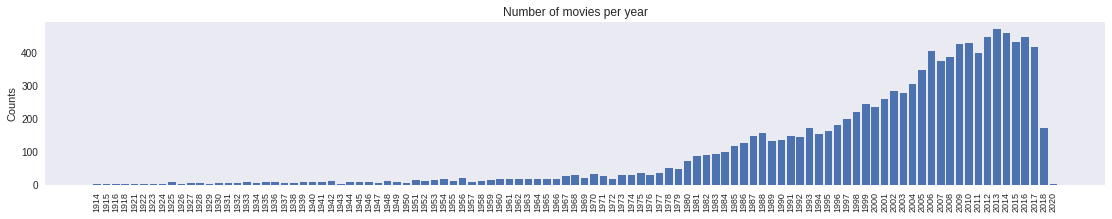

In [314]:
X = dfMovies['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMovies['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

####PRODUCTION COUNTRIES ANALYSIS

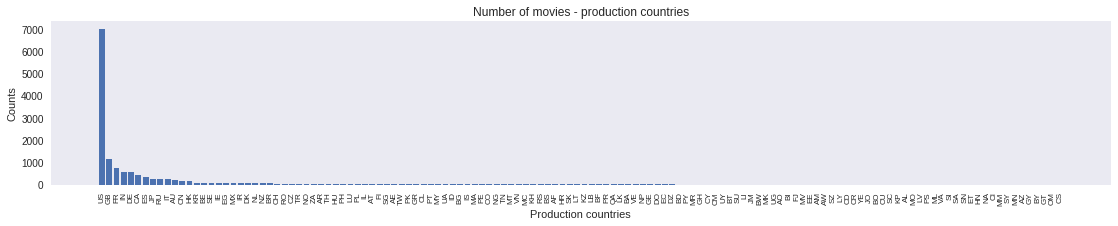

In [313]:
X = dfMoviesProductionCountries['iso_3166_1'].value_counts().index
Y = dfMoviesProductionCountries['iso_3166_1'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=8)
plt.grid(False)

plt.title('Number of movies - production countries')
plt.xlabel('Production countries')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [319]:
dfMoviesProductionCountries['iso_3166_1'].value_counts().head(10)

US    6997
GB    1173
FR     734
IN     568
DE     559
CA     437
ES     321
JP     256
RU     254
IT     232
Name: iso_3166_1, dtype: int64

####ORIGINAL LANGUAGE

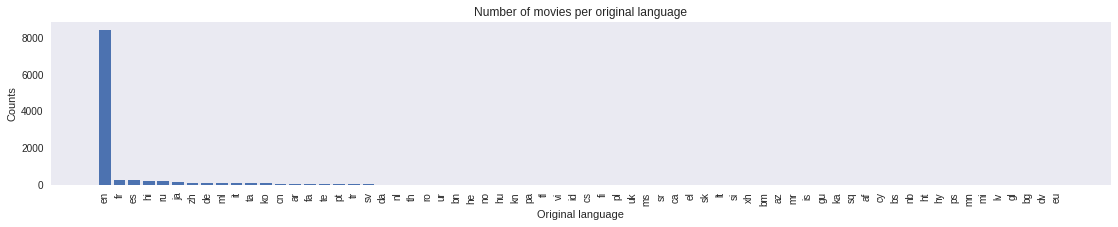

In [317]:
X = dfMovies['original_language'].value_counts().index
Y = dfMovies['original_language'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=10)
plt.grid(False)

plt.title('Number of movies per original language')
plt.xlabel('Original language')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [320]:
dfMovies['original_language'].value_counts().head(10)

en    8413
fr     295
es     290
hi     245
ru     239
ja     157
zh     109
de     106
ml     102
it      99
Name: original_language, dtype: int64

####RELEASE DATE

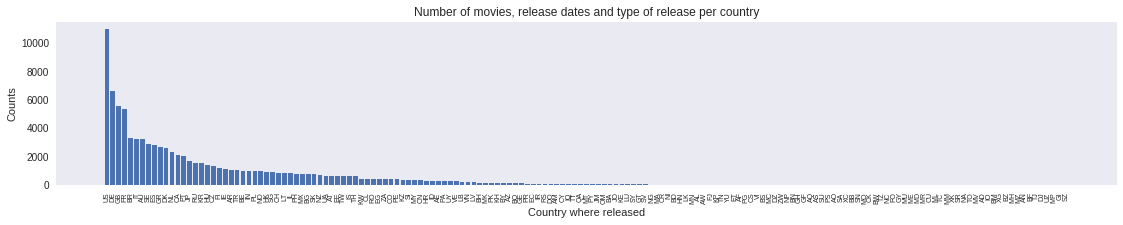

In [325]:
X = dfMoviesReleaseDates['iso_3166_1'].value_counts().index
Y = dfMoviesReleaseDates['iso_3166_1'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=7)
plt.grid(False)

plt.title('Number of movies, release dates and type of release per country')
plt.xlabel('Country where released')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

####FILTER: MOVIES RELEASED IN THE US WITH KNOWN RELEASE DATE UP TO 2017.

In [331]:
dfMoviesReleaseDates.dtypes

certification    object
iso_3166_1       object
iso_639_1        object
movie_id          int64
release_date     object
type              int64
dtype: object

In [0]:
#Voy a necesitar asegurarme de que la fecha en dfMoviesReleaseDates está en modo fecha. 
#Los posibles blancos ya se los quité. Así que lo siguiente no hace falta:
#dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].str.strip()

In [0]:
#Ya vimos que no hay ni nulos ni cadenas de longitud vacía. Así que no nos hace falta esto:
#dfMoviesReleaseDates[dfMoviesReleaseDates['release_date'].str.len()==0].shape[0]

In [327]:
#What format does this column have?
dfMoviesReleaseDates['release_date'].str.len().value_counts()

24    91749
Name: release_date, dtype: int64

In [328]:
dfMoviesReleaseDates['release_date'].head()
#Me da un poco igual que esté en GMT o en local. No va mover ficha.

0    1996-11-22T00:00:00.000Z
1    1996-05-09T00:00:00.000Z
2    2006-01-06T00:00:00.000Z
3    2007-06-14T00:00:00.000Z
4    2007-06-15T00:00:00.000Z
Name: release_date, dtype: object

In [332]:
#Let's make sure that there is no mistakes with the format: YYYY-MM-DD or YYYY-DD-MM:
#This is the month:
dfMoviesReleaseDates['release_date'].map(lambda date: date[5:7]).unique()

array(['11', '05', '01', '06', '10', '07', '08', '02', '09', '03', '04',
       '12'], dtype=object)

In [335]:
#This is the day:
dfMoviesReleaseDates['release_date'].map(lambda date: date[8:10]).unique()

array(['22', '09', '06', '14', '15', '26', '10', '13', '08', '02', '12',
       '16', '01', '31', '20', '21', '03', '25', '17', '19', '27', '24',
       '23', '30', '29', '07', '11', '05', '18', '28', '04'], dtype=object)

In [337]:
#And this is the year:
dfMoviesReleaseDates['release_date'].map(lambda date: date[0:4]).unique()

array(['1996', '2006', '2007', '2004', '2005', '2015', '1993', '2017',
       '2016', '1986', '1933', '2012', '2011', '2010', '1976', '1975',
       '2018', '2009', '1999', '1992', '2008', '2013', '1941', '1946',
       '1951', '1952', '1942', '1948', '1940', '1989', '1981', '2002',
       '1985', '2003', '1987', '1988', '1995', '2000', '1982', '2014',
       '1973', '1971', '1972', '1990', '1991', '2001', '1974', '1983',
       '1997', '1984', '1965', '1979', '1998', '2019', '1994', '1978',
       '1977', '1968', '1931', '1953', '1955', '1956', '1980', '1962',
       '1963', '1957', '1959', '1970', '1950', '1945', '1947', '1961',
       '1964', '1967', '1960', '1936', '1966', '1969', '1954', '1926',
       '1943', '1958', '1944', '1934', '1949', '1915', '1918', '1932',
       '1938', '1939', '1937', '1914', '1935', '1925', '1928', '1927',
       '1929', '2020', '1922', '1924', '1916', '1921', '1920', '1923',
       '1930'], dtype=object)

In [0]:
#So we can convert release_date into datetime format:
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].map(lambda str: str[0:10]).map(pd.to_datetime)

In [344]:
dfMoviesReleaseDates.dtypes

certification            object
iso_3166_1               object
iso_639_1                object
movie_id                  int64
release_date     datetime64[ns]
type                      int64
dtype: object

In [0]:
#FILTER: MOVIES RELEASED IN THE US WITH KNOWN RELEASE DATE UP TO 2017-12-31.
dfMoviesIdsUS = pd.DataFrame(dfMoviesReleaseDates[(dfMoviesReleaseDates['release_date']<='2017-12-31') & (dfMoviesReleaseDates['iso_3166_1']=='US')]['movie_id'].unique(), columns=['movie_id'])

In [411]:
dfMoviesIdsUS.shape

(8804, 1)

In [0]:
#Se pierde alguna fila porque en dfMovies habíamos filtrado las status="Released"
dfMoviesUS = dfMovies.merge(dfMoviesIdsUS, how='inner')

In [413]:
dfMoviesUS.shape

(8790, 28)

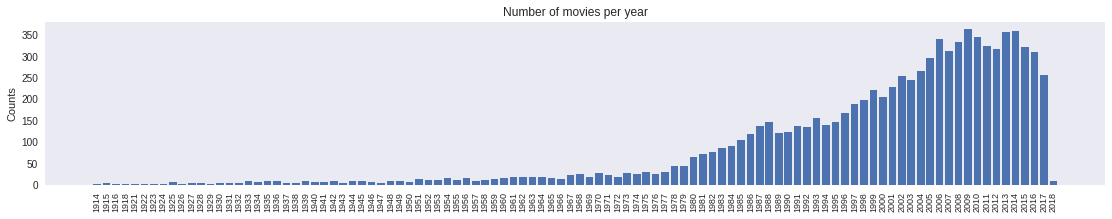

In [415]:
X = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

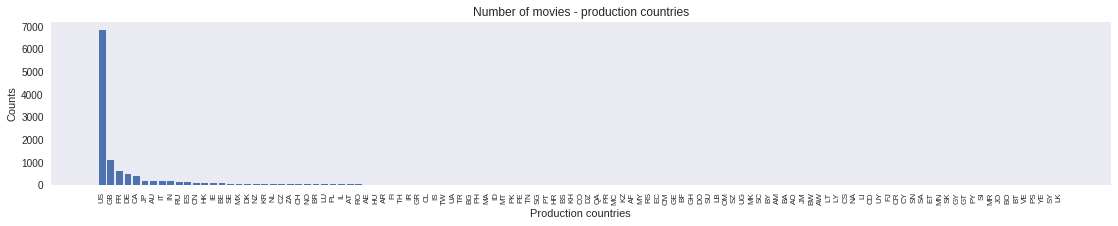

In [416]:
X = dfMoviesProductionCountries.merge(dfMoviesIdsUS, how='inner')['iso_3166_1'].value_counts().index
Y = dfMoviesProductionCountries.merge(dfMoviesIdsUS, how='inner')['iso_3166_1'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=8)
plt.grid(False)

plt.title('Number of movies - production countries')
plt.xlabel('Production countries')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

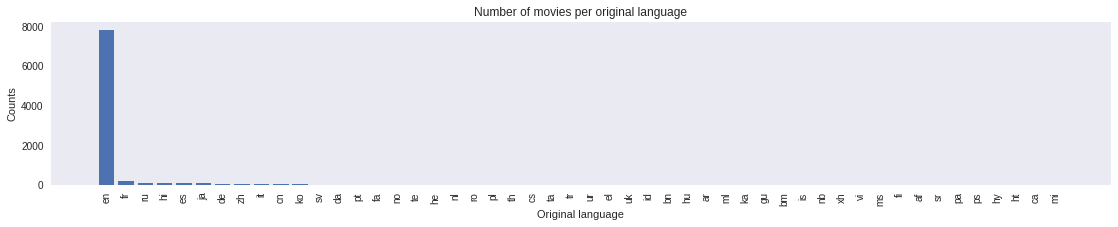

In [417]:
X = dfMoviesUS['original_language'].value_counts().index
Y = dfMoviesUS['original_language'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=10)
plt.grid(False)

plt.title('Number of movies per original language')
plt.xlabel('Original language')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [419]:
dfMoviesUS['original_language'].value_counts()

en    7832
fr     196
ru     113
hi      98
es      86
ja      83
de      57
zh      51
it      46
cn      43
ko      34
sv      20
da      16
pt      11
fa       9
no       8
te       7
he       7
nl       6
ro       5
pl       5
th       5
cs       5
ta       4
tr       4
ur       3
el       3
uk       3
id       3
bn       3
hu       2
ar       2
ml       2
ka       2
gu       1
bm       1
is       1
nb       1
xh       1
vi       1
ms       1
fi       1
af       1
sr       1
pa       1
ps       1
hy       1
ht       1
ca       1
mi       1
Name: original_language, dtype: int64

####REVENUE ANALYSIS

In [423]:
dfMoviesUS['revenue_final'].sort_values(ascending=False).head(10)

7928    2.787965e+09
8405    2.068224e+09
8608    1.845034e+09
8570    1.671713e+09
1344    1.519558e+09
7671    1.506249e+09
441     1.405404e+09
2878    1.342000e+09
997     1.332460e+09
4397    1.274219e+09
Name: revenue_final, dtype: float64

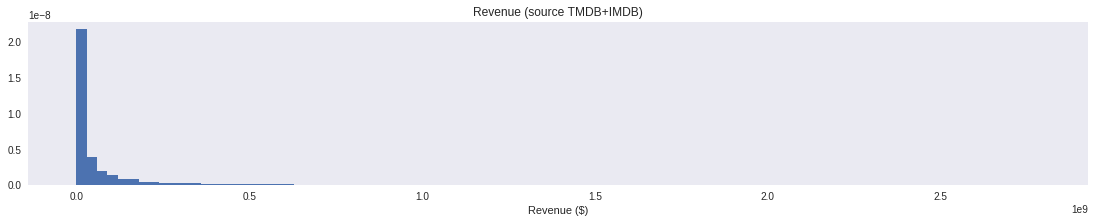

In [434]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS.shape[0]))
plt.hist(dfMoviesUS['revenue_final'], bins=num_bins, normed = True)

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue (source TMDB+IMDB)')
figure.set_size_inches([19,3])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


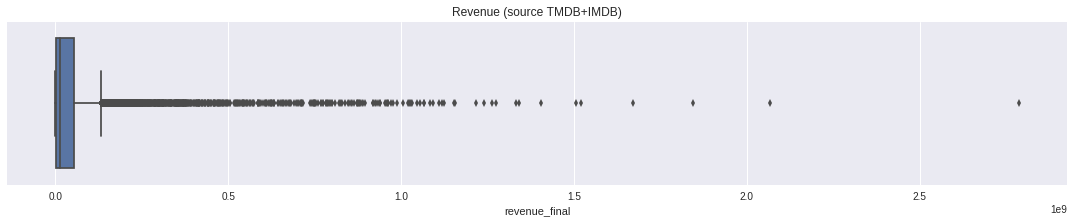

In [425]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue_final'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB+IMDB)')
plt.show()

In [426]:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,7.973000e+03,4.010000e+03,8.790000e+03
mean,6.546499e+07,4.806592e+07,6.055134e+07
std,1.446889e+08,6.738378e+07,1.388242e+08
min,1.000000e+00,1.620000e+02,1.000000e+00
25%,1.562546e+06,5.488766e+06,1.300000e+06
50%,1.411001e+07,2.544575e+07,1.234577e+07
75%,6.103784e+07,6.220937e+07,5.320411e+07
max,2.787965e+09,7.605058e+08,2.787965e+09


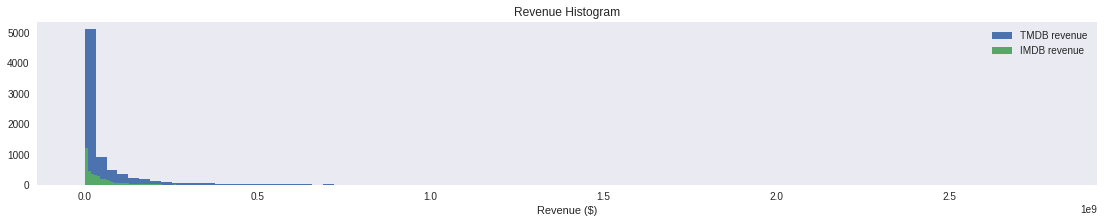

In [490]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS['revenue'].notnull().sum()))
plt.hist(dfMoviesUS['revenue'][dfMoviesUS['revenue'].notnull()], bins=num_bins, label='TMDB revenue')
plt.hist(dfMoviesUS['imdb_revenue'][dfMoviesUS['imdb_revenue'].notnull()], bins=num_bins, label='IMDB revenue')

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue Histogram')
plt.legend(loc='best')
figure.set_size_inches([19,3])

plt.show()

In [0]:
#Pendiente mejorar!!!!
figure, axes = plt.subplots(1,2)

axes[0].boxplot(dfMoviesUS[dfMoviesUS['revenue'].notnull()]['revenue'])
plt.title('Revenue (source TMDB)')
axes[1].boxplot(dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['imdb_revenue'])

figure.set_size_inches([19,6])
plt.title('Revenue (source TMDB)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


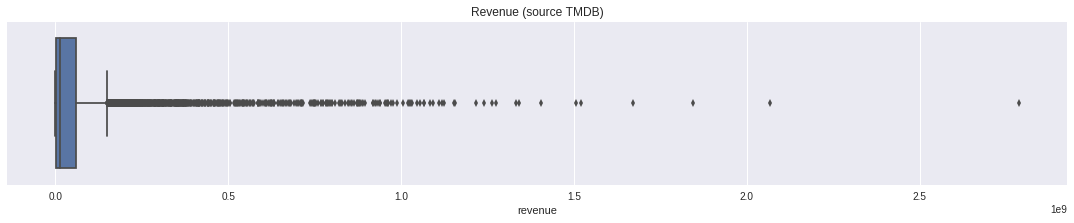

In [517]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


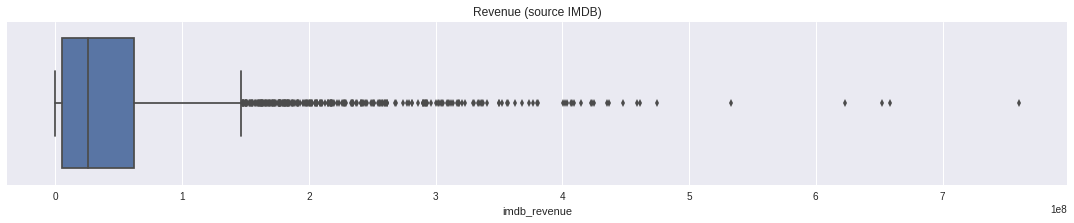

In [518]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['imdb_revenue'])

figure.set_size_inches([19,3])
plt.title('Revenue (source IMDB)')
plt.show()

In [433]:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,7.973000e+03,4.010000e+03,8.790000e+03
mean,6.546499e+07,4.806592e+07,6.055134e+07
std,1.446889e+08,6.738378e+07,1.388242e+08
min,1.000000e+00,1.620000e+02,1.000000e+00
25%,1.562546e+06,5.488766e+06,1.300000e+06
50%,1.411001e+07,2.544575e+07,1.234577e+07
75%,6.103784e+07,6.220937e+07,5.320411e+07
max,2.787965e+09,7.605058e+08,2.787965e+09


In [524]:
dfMoviesUS['revenue'].value_counts().sort_index().head(10)

1.0     27
2.0      8
3.0      5
4.0      4
5.0      9
6.0      7
7.0      6
8.0      9
9.0      4
10.0    10
Name: revenue, dtype: int64

In [523]:
dfMoviesUS['imdb_revenue'].value_counts().sort_index().head(10)

162.0     1
703.0     1
721.0     1
728.0     1
828.0     1
1111.0    1
1332.0    1
1521.0    1
1711.0    1
2436.0    1
Name: imdb_revenue, dtype: int64

In [0]:
limit = 10000

In [561]:
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]

434

In [562]:
#Y de los anteriores, cuántos tienen dato en IMDB?
dfMoviesUS[(dfMoviesUS['revenue']<=limit) & (dfMoviesUS['imdb_revenue'].notnull())].shape[0]

29

In [563]:
#Veamoslos:
dfMoviesUS[(dfMoviesUS['revenue']<=limit) & (dfMoviesUS['imdb_revenue'].notnull())][['revenue', 'imdb_revenue', 'revenue_final']].sort_values(by='revenue')

,revenue,imdb_revenue,revenue_final
7136,5.0,4771000.0,4771000.0
3636,5.0,5430822.0,5430822.0
5847,7.0,7680.0,7680.0
5952,8.0,8596914.0,8596914.0
2966,8.0,8579684.0,8579684.0
56,10.0,10149779.0,10149779.0
7790,11.0,11835.0,11835.0
3222,12.0,11540112.0,11540112.0
7517,12.0,12189514.0,12189514.0
3970,13.0,13038660.0,13038660.0


De las 283 películas en TMDB con ingreso menor que 500dólares, viendo el dato equivalente de IMDB cuando está disponible, veo que ningún dato es correcto. Por encima de 1500 ya parece que sí. 
En IMDB, la única peli con ingreso menor que 500 también parece un error.
Así que: voy a convertir nulos todos los valores de ingresos que sean menores que 500. 
Esto puede afectar a mis datos de pelis antiguas, pero puede hacer más daño en mi modelo de pelis más actuales. Tendré que centrarme en las pelis más actuales. 
El dato de IMDB lo tomaré cuando tenga nulo en TMDB, siembre y cuando la fecha sea anterior al 1/ene/2016.

In [603]:
limit = 500
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]

283

In [604]:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].shape[0]

1

In [628]:
#¿cúal es? Parece que es un error también.
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].iloc[0]

belongs_to_collection_id                                                    NaN
belongs_to_collection_name                                                 None
budget                                                                    1e+07
imdb_id                                                               tt1641841
movie_id                                                                 327833
original_language                                                            en
original_title                                                       Skin Trade
overview                      After his family is killed by a Serbian gangst...
popularity                                                                5.164
release_date                                                2014-11-07 00:00:00
revenue                                                                     NaN
reviews_page                                                                  1
reviews_total_pages                     

In [605]:
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]/dfMoviesUS['revenue'].notnull().sum()

0.03549479493289853

In [606]:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].shape[0]/dfMoviesUS['imdb_revenue'].notnull().sum()

0.00024937655860349125

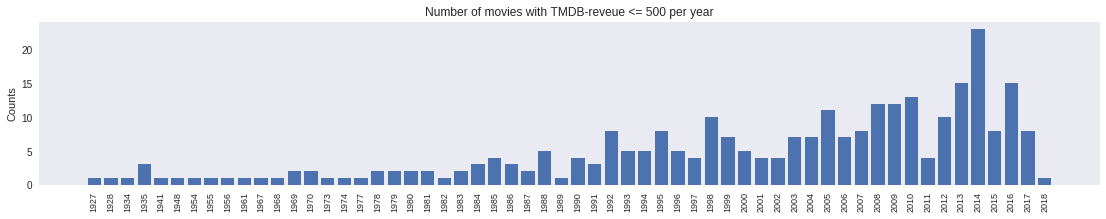

In [607]:
X = dfMoviesUS[dfMoviesUS['revenue']<=limit]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['revenue']<=limit]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies with TMDB-reveue <= %s per year'%limit)
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

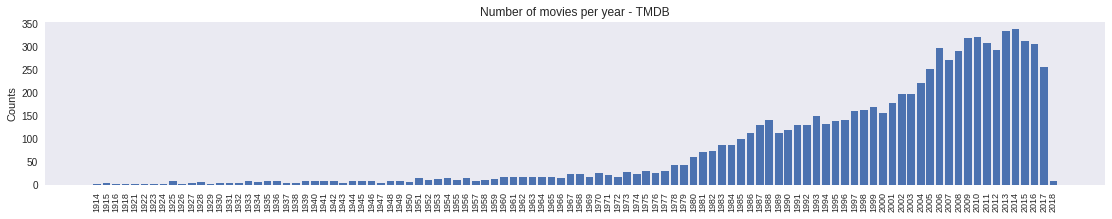

In [608]:
X = dfMoviesUS[dfMoviesUS['revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year - TMDB')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

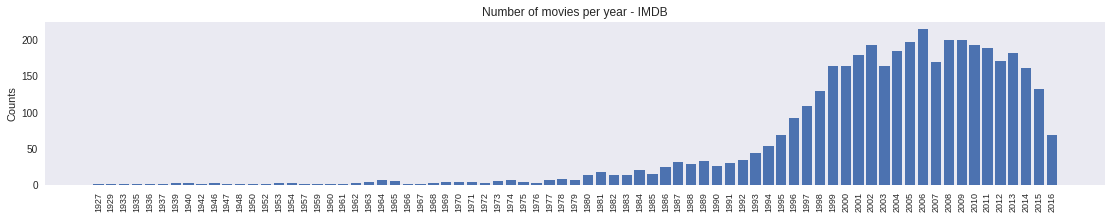

In [609]:
#La tabla de IMDB que he usado se publicó en sep-2016. Así que no tomaré los datos posteriores al 31/12/2015.
X = dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year - IMDB')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [0]:
#¿Cuántas pelis tengo en ambas fuentes anteriores a 1970? ¿Qué peso suponen?
dateLimit = '1950-01-01'

In [611]:
dfMoviesUS[(dfMoviesUS['revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]

161

In [612]:
dfMoviesUS[(dfMoviesUS['imdb_revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]

15

In [613]:
dfMoviesUS[(dfMoviesUS['revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]/dfMoviesUS['revenue'].notnull().sum()

0.02019315188762072

In [614]:
dfMoviesUS[(dfMoviesUS['imdb_revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]/dfMoviesUS['imdb_revenue'].notnull().sum()

0.003740648379052369

In [0]:
#1: Tomo el dato de TMDB, a no ser que sea nulo, en cuyo caso tomo el de IMDB.
dfMoviesUS['revenue_final'] = dfMoviesUS['revenue'].combine_first(dfMoviesUS['imdb_revenue'])

In [0]:
#2: Pero desde el 1/ene/2016 tomo siempre el de TMDB.
dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue_final'] = dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue']

In [0]:
#3: Anulo el ingreso final si es menor que 500$:
dfMoviesUS.loc[dfMoviesUS['revenue_final']<=500, 'revenue_final'] = None

In [644]:
#A ver si lo he hecho bien:
dfMoviesUS[dfMoviesUS['revenue_final']<=500].shape[0]

0

In [645]:
dfMoviesUS[dfMoviesUS['release_date']>='2016-01-01'][['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,5.680000e+02,6.900000e+01,5.440000e+02
mean,9.991224e+07,6.782357e+07,1.043201e+08
std,2.076236e+08,8.313389e+07,2.110739e+08
min,1.000000e+00,3.166200e+04,6.000000e+02
25%,7.300268e+05,1.909799e+07,1.195026e+06
50%,1.118537e+07,4.697900e+07,1.388977e+07
75%,9.301395e+07,7.884513e+07,1.023921e+08
max,1.332460e+09,4.071973e+08,1.332460e+09


In [1]:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

NameError: ignored

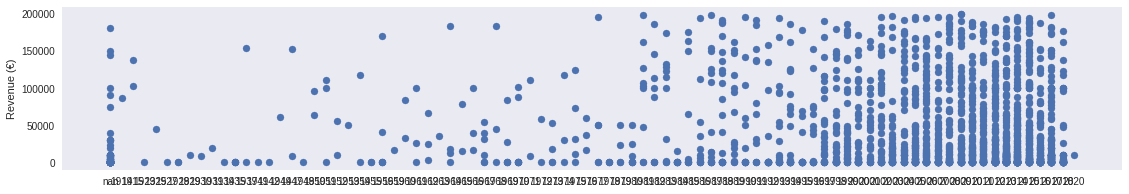

In [233]:
X = dfMovies[dfMovies['revenue_final']<200000]['release_date'].map(lambda datetime: datetime.year).map(lambda number: '%.0f'%number)
Y = dfMovies[dfMovies['revenue_final']<200000]['revenue_final']

figure, axes = plt.subplots(1,1)

plt.scatter(X, Y)
#plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.ylabel('Revenue (€)')

figure.set_size_inches([19,3])

plt.show()